In [1]:
from ScoringPy.module import WoeAnalysis
import pandas as pd 
import numpy as np

In [2]:
# --- Generate synthetic data
np.random.seed(42)

n = 1000  # Number of samples

# Generate features
data = pd.DataFrame({
    'Income': np.random.normal(loc=50000, scale=15000, size=n),
    'Age': np.random.randint(20, 70, size=n),
    'JobType': np.random.choice(['Salaried', 'Self-Employed', 'Unemployed'], size=n, p=[0.6, 0.3, 0.1]),
})

# Generate binary target with a little correlation
data['Actual'] = np.where(
    (data['Income'] > 55000) & (data['JobType'] == 'Salaried') & (data['Age'] < 50),
    1, np.random.choice([0, 1], size=n, p=[0.6, 0.4])
)

# Separate target
target = data['Actual']
df = data.drop(columns='Actual')

# --- Initialize WoeAnalysis
woe_analysis = WoeAnalysis()

,Income_factor,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,"(1200, 1400]",1,100.0,0.0,0.0,1.0,100.0,NaN,100.0,NaN,NaN,NaN,0.0,NaN,False


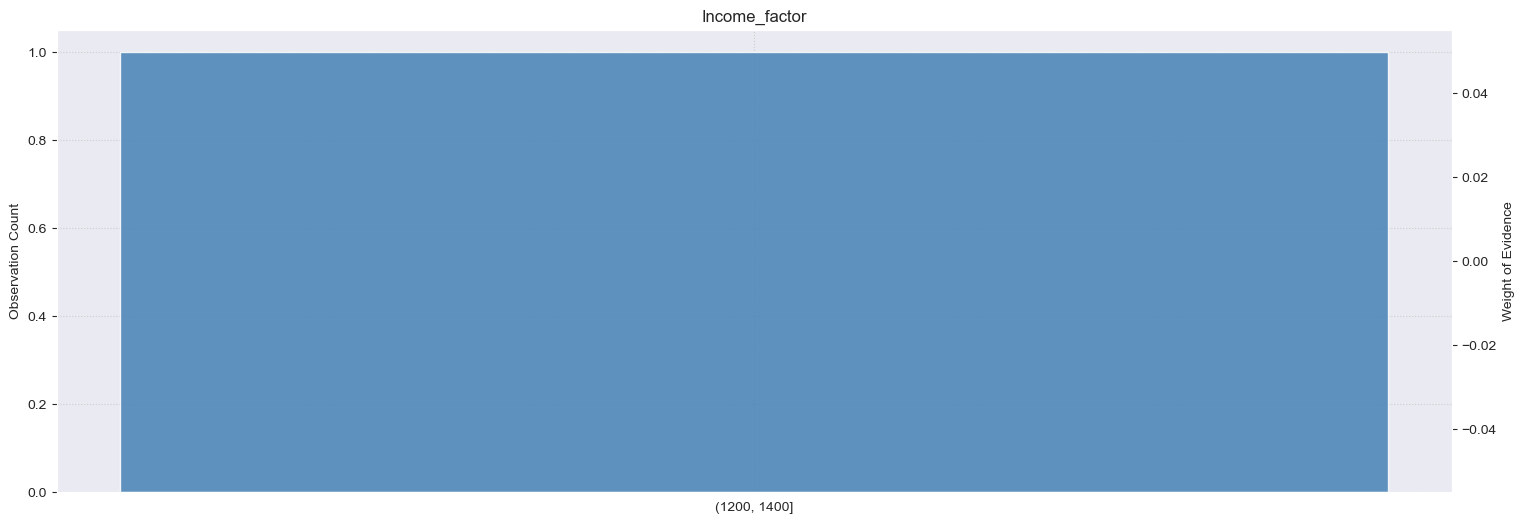

In [3]:
ranges = pd.IntervalIndex.from_tuples([(100, 1200), (1200, 1400), (1400, 1600), (1600, 1800), (1800, 2000)])
woe_analysis.continuous(column='Income', df=df, target=target, bins=ranges).plot_data().report()

In [4]:
ranges = pd.IntervalIndex.from_tuples([(100, 1200), (1200, 1400), (1400, 1600), (1600, 1800), (1800, 2000)])
woe_analysis.continuous(column='Income', df=df, target=target, bins=ranges).report().plot_data()

AttributeError: You cannot chain `.plot_data()` after `.report()`. Call `.plot_data()` before `.report()`.

<Axes: >

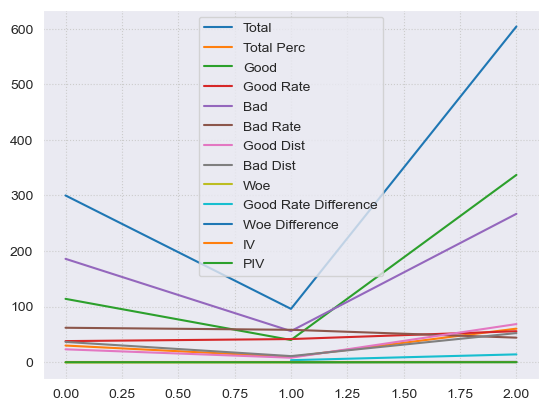

In [5]:
woe_analysis.discrete(column='JobType', df=df, target=target).report().plot()

,JobType,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,Self-Employed,300,30.0,114.0,38.000000,186.0,62.000000,23.217923,36.542240,-0.453544,NaN,NaN,0.112508,0.060432,True
1,Unemployed,96,9.6,40.0,41.666667,56.0,58.333333,8.146640,11.001965,-0.300468,3.666667,0.153076,0.112508,0.008579,True
2,Salaried,604,60.4,337.0,55.794702,267.0,44.205298,68.635438,52.455796,0.268838,14.128035,0.569307,0.112508,0.043497,True


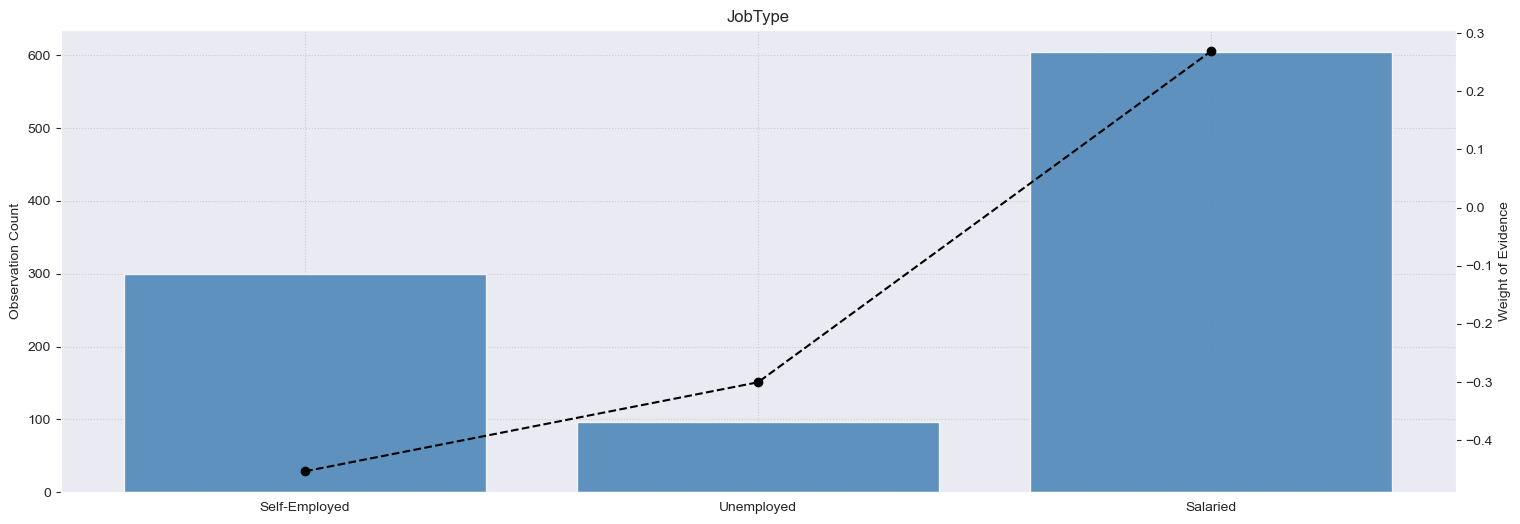

In [9]:
woe_analysis.discrete(column='JobType', df=df, target=target).plot_data().report()

<ScoringPy.module.WoeAnalysis.discrete.<locals>.DiscretePlotter at 0x1e1012fc3d0>

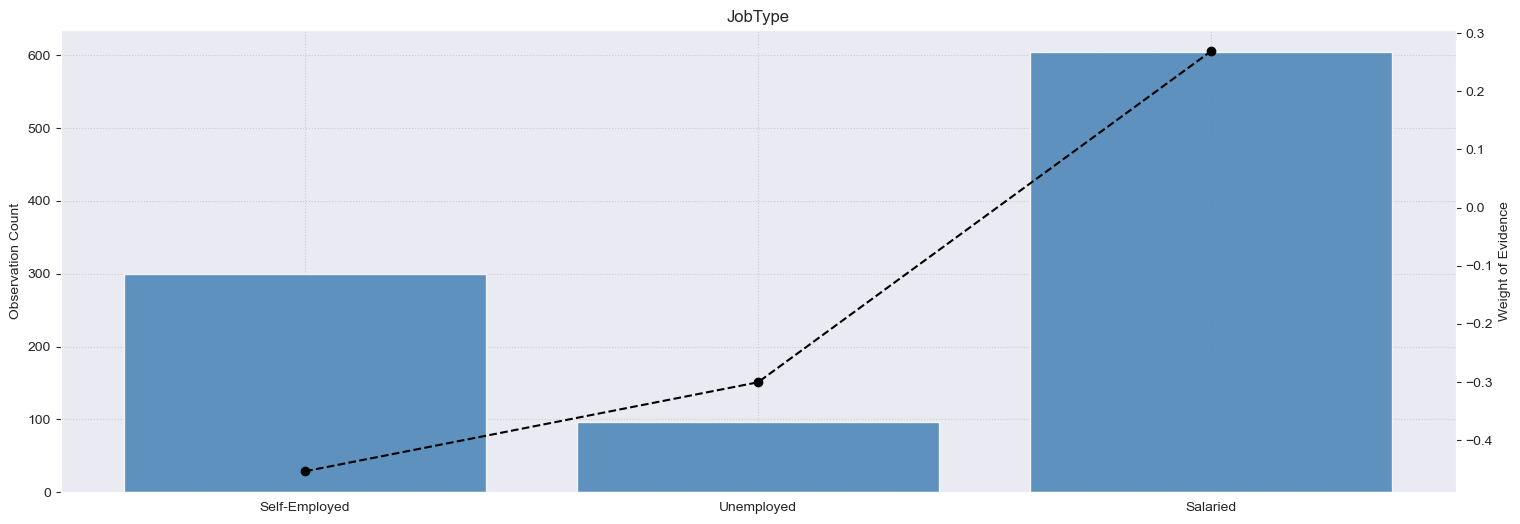

In [10]:
woe_analysis.discrete(column='JobType', df=df, target=target).plot_data()